Implemente os classificadores k-NN, com e sem peso, e o k-NN adaptativo; use distância Euclidiana. Avalie os três classificadores em duas bases de dados do repositório Promise (ver link abaixo). Essas bases devem conter apenas atributos numéricos. Varie o parâmetro k = {1,2,3,5,7,9,11,13,15} e construa um gráfico que mostre o comportamento da taxa de acerto à medida que o valor de k muda para os três classificadores. Analise os resultados em relação ao tempo de processamento e à taxa de acerto, e construa uma argumentação que indique as melhores escolhas para as bases de dados avaliadas. (dica: observe o valor de k, o acerto/erro por classe, o tempo de treinamento e o tempo de teste).

Promise repository: http://promise.site.uottawa.ca/SERepository/datasets-page.html. Na avaliação dos algoritmos, use o k-fold cross-validation. O relatório deve conter informações de forma que seja possível replicar os experimentos (metodologia dos experimentos), além dos resultados e suas análises.

# Dataset **KC1/Software defect prediction**

Title/Topic: KC1/Software defect prediction

Donor: Tim Menzies (tim@barmag.net)

Date: December 2, 2004

Sources:

Creators:
NASA, then the NASA Metrics Data Program,
http://mdp.ivv.nasa.gov.

In [10]:
import pandas as pd
import numpy as np
kc1Dataset = pd.read_csv('datasets/kc1.csv')
kc1Dataset.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,...,65,10,6,0,18.0,25.0,107.0,64.0,21.0,True
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,...,37,2,5,0,16.0,28.0,89.0,52.0,15.0,True
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,...,21,0,2,0,11.0,10.0,41.0,17.0,5.0,True


In [11]:
# tratando os dados
kc1Dataset['problems'] = kc1Dataset['problems'].astype(int)
kc1Dataset.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,...,65,10,6,0,18.0,25.0,107.0,64.0,21.0,1
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,...,37,2,5,0,16.0,28.0,89.0,52.0,15.0,1
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,...,21,0,2,0,11.0,10.0,41.0,17.0,5.0,1


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection  import KFold
from sklearn.model_selection import cross_val_score
import time

variacoes_k = [1,2,3,5,7,9,11,13,15]
SEED = 5
np.random.seed(SEED)
x = kc1Dataset.loc[:, kc1Dataset.columns != 'problems']
y = kc1Dataset['problems']

# prepara o procedimento cross-validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.4,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 1265 elementos e testaremos com 844 elementos


In [13]:
taxasAcertoSemPeso = pd.DataFrame(columns=['k', 'acuracia'])
for k in variacoes_k:
    neigh = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='euclidean')

    inicioTreino = time.time()
    neigh.fit(treino_x, treino_y)
    fimTreino = time.time()
    tempoTreino = fimTreino - inicioTreino

    inicioTeste = time.time()
    previsoes = neigh.predict(teste_x)
    fimTeste = time.time()
    tempoTeste = fimTeste - inicioTeste

    #calculando a acuracia
    acuracia = np.mean(cross_val_score(neigh, teste_x, teste_y, cv=cv))
    print(f"A acurácia com k={k} foi %.2f%%" % (acuracia * 100))
    print("Tempo de treino: %.4g s" % tempoTreino)
    print("Tempo de teste: %.4g s" % tempoTeste)
    taxasAcertoSemPeso.loc[k] = [k, acuracia]

A acurácia com k=1 foi 81.28%
Tempo de treino: 0.005741 s
Tempo de teste: 0.1676 s
A acurácia com k=2 foi 84.48%
Tempo de treino: 0.0135 s
Tempo de teste: 0.2256 s
A acurácia com k=3 foi 83.07%
Tempo de treino: 0.00724 s
Tempo de teste: 0.2332 s
A acurácia com k=5 foi 84.37%
Tempo de treino: 0.00458 s
Tempo de teste: 0.1687 s
A acurácia com k=7 foi 84.84%
Tempo de treino: 0.007073 s
Tempo de teste: 0.191 s
A acurácia com k=9 foi 83.89%
Tempo de treino: 0.004731 s
Tempo de teste: 0.1668 s
A acurácia com k=11 foi 83.89%
Tempo de treino: 0.007184 s
Tempo de teste: 0.1944 s
A acurácia com k=13 foi 84.83%
Tempo de treino: 0.00552 s
Tempo de teste: 0.1488 s
A acurácia com k=15 foi 84.60%
Tempo de treino: 0.00314 s
Tempo de teste: 0.1557 s


       k  acuracia
1    1.0  0.812773
2    2.0  0.844790
3    3.0  0.830658
5    5.0  0.843683
7    7.0  0.848375
9    9.0  0.838908
11  11.0  0.838880
13  13.0  0.848347
15  15.0  0.846008


Text(0, 0.5, 'Acurácia')

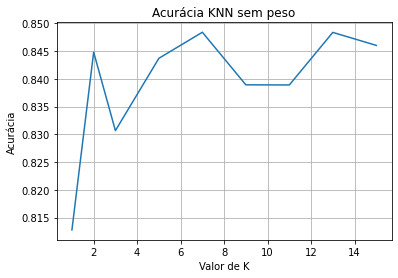

In [14]:
import matplotlib.pyplot as plt

print(taxasAcertoSemPeso)
plt.plot(taxasAcertoSemPeso['k'],taxasAcertoSemPeso['acuracia'])
plt.title("Acurácia KNN sem peso")
plt.grid(True)
plt.xlabel("Valor de K")
plt.ylabel("Acurácia")

In [15]:
taxasAcertoComPeso = pd.DataFrame(columns=['k', 'acuracia'])
for k in variacoes_k:
    neigh = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')
    inicioTreino = time.time()
    neigh.fit(treino_x, treino_y)
    fimTreino = time.time()
    tempoTreino = fimTreino - inicioTreino

    inicioTeste = time.time()
    previsoes = neigh.predict(teste_x)
    fimTeste = time.time()
    tempoTeste = fimTeste - inicioTeste

    #calculando a acuracia
    acuracia = np.mean(cross_val_score(neigh, teste_x, teste_y, cv=cv))
    print(f"A acurácia com k={k} foi %.2f%%" % (acuracia * 100))
    print("Tempo de treino: %.4g s" % tempoTreino)
    print("Tempo de teste: %.4g s" % tempoTeste)
    taxasAcertoComPeso.loc[k] = [k, acuracia]

A acurácia com k=1 foi 81.28%
Tempo de treino: 0.005396 s
Tempo de teste: 0.04571 s
A acurácia com k=2 foi 81.75%
Tempo de treino: 0.01976 s
Tempo de teste: 0.0932 s
A acurácia com k=3 foi 82.82%
Tempo de treino: 0.007041 s
Tempo de teste: 0.07789 s
A acurácia com k=5 foi 83.30%
Tempo de treino: 0.007253 s
Tempo de teste: 0.1339 s
A acurácia com k=7 foi 83.65%
Tempo de treino: 0.007105 s
Tempo de teste: 0.08082 s
A acurácia com k=9 foi 83.30%
Tempo de treino: 0.007743 s
Tempo de teste: 0.1215 s
A acurácia com k=11 foi 83.18%
Tempo de treino: 0.007469 s
Tempo de teste: 0.1136 s
A acurácia com k=13 foi 83.06%
Tempo de treino: 0.005207 s
Tempo de teste: 0.1673 s
A acurácia com k=15 foi 83.77%
Tempo de treino: 0.01466 s
Tempo de teste: 0.1907 s


       k  acuracia
1    1.0  0.812773
2    2.0  0.817507
3    3.0  0.828249
5    5.0  0.832955
7    7.0  0.836527
9    9.0  0.832955
11  11.0  0.831765
13  13.0  0.830588
15  15.0  0.837689


Text(0, 0.5, 'Acurácia')

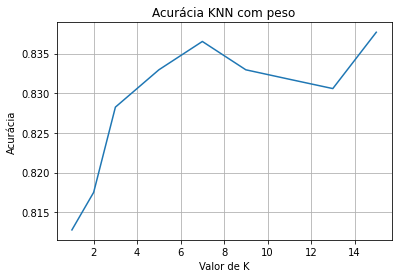

In [16]:
import matplotlib.pyplot as plt

print(taxasAcertoComPeso)
plt.plot(taxasAcertoComPeso['k'],taxasAcertoComPeso['acuracia'])
plt.title("Acurácia KNN com peso")
plt.grid(True)
plt.xlabel("Valor de K")
plt.ylabel("Acurácia")

# Dataset **CM1/Software defect prediction**

Title/Topic: CM1/Software defect prediction

Donor: Tim Menzies (tim@barmag.net)

Date: December 2, 2004

Sources:

Creators:
NASA, then the NASA Metrics Data Program,
http://mdp.ivv.nasa.gov.

In [17]:
cm1Dataset = pd.read_csv('datasets/cm1.csv')
cm1Dataset.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False


In [18]:
# tratando os dados
cm1Dataset['defects'] = cm1Dataset['defects'].astype(int)
cm1Dataset.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,1,0,6,0,15.0,15.0,44.0,19.0,9.0,0
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,0,3,0,16.0,8.0,31.0,16.0,7.0,0
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,0


In [19]:
variacoes_k = [1,2,3,5,7,9,11,13,15]
SEED = 5
np.random.seed(SEED)
x = cm1Dataset.loc[:, cm1Dataset.columns != 'defects']
y = cm1Dataset['defects']

# prepara o procedimento cross-validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.4,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 298 elementos e testaremos com 200 elementos


In [20]:
taxasAcertoSemPeso = pd.DataFrame(columns=['k', 'acuracia'])
for k in variacoes_k:
    neigh = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='euclidean')

    inicioTreino = time.time()
    neigh.fit(treino_x, treino_y)
    fimTreino = time.time()
    tempoTreino = fimTreino - inicioTreino

    inicioTeste = time.time()
    previsoes = neigh.predict(teste_x)
    fimTeste = time.time()
    tempoTeste = fimTeste - inicioTeste

    #calculando a acuracia
    acuracia = np.mean(cross_val_score(neigh, teste_x, teste_y, cv=cv))
    print(f"A acurácia com k={k} foi %.2f%%" % (acuracia * 100))
    print("Tempo de treino: %.4g s" % tempoTreino)
    print("Tempo de teste: %.4g s" % tempoTeste)
    taxasAcertoSemPeso.loc[k] = [k, acuracia]

A acurácia com k=1 foi 80.50%
Tempo de treino: 0.004389 s
Tempo de teste: 0.03766 s
A acurácia com k=2 foi 88.00%
Tempo de treino: 0.003195 s
Tempo de teste: 0.03408 s
A acurácia com k=3 foi 86.50%
Tempo de treino: 0.004383 s
Tempo de teste: 0.02367 s
A acurácia com k=5 foi 89.50%
Tempo de treino: 0.005559 s
Tempo de teste: 0.03131 s
A acurácia com k=7 foi 90.00%
Tempo de treino: 0.003358 s
Tempo de teste: 0.03258 s
A acurácia com k=9 foi 90.00%
Tempo de treino: 0.002953 s
Tempo de teste: 0.0614 s
A acurácia com k=11 foi 90.00%
Tempo de treino: 0.004467 s
Tempo de teste: 0.03177 s
A acurácia com k=13 foi 90.00%
Tempo de treino: 0.004087 s
Tempo de teste: 0.0324 s
A acurácia com k=15 foi 90.00%
Tempo de treino: 0.00305 s
Tempo de teste: 0.03742 s


       k  acuracia
1    1.0     0.805
2    2.0     0.880
3    3.0     0.865
5    5.0     0.895
7    7.0     0.900
9    9.0     0.900
11  11.0     0.900
13  13.0     0.900
15  15.0     0.900


Text(0, 0.5, 'Acurácia')

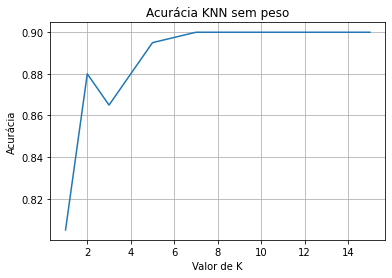

In [21]:
print(taxasAcertoSemPeso)
plt.plot(taxasAcertoSemPeso['k'],taxasAcertoSemPeso['acuracia'])
plt.title("Acurácia KNN sem peso")
plt.grid(True)
plt.xlabel("Valor de K")
plt.ylabel("Acurácia")

In [22]:
taxasAcertoComPeso = pd.DataFrame(columns=['k', 'acuracia'])
for k in variacoes_k:
    neigh = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')
    inicioTreino = time.time()
    neigh.fit(treino_x, treino_y)
    fimTreino = time.time()
    tempoTreino = fimTreino - inicioTreino

    inicioTeste = time.time()
    previsoes = neigh.predict(teste_x)
    fimTeste = time.time()
    tempoTeste = fimTeste - inicioTeste

    #calculando a acuracia
    acuracia = np.mean(cross_val_score(neigh, teste_x, teste_y, cv=cv))
    print(f"A acurácia com k={k} foi %.2f%%" % (acuracia * 100))
    print("Tempo de treino: %.4g s" % tempoTreino)
    print("Tempo de teste: %.4g s" % tempoTeste)
    taxasAcertoComPeso.loc[k] = [k, acuracia]

A acurácia com k=1 foi 80.50%
Tempo de treino: 0.003933 s
Tempo de teste: 0.006398 s
A acurácia com k=2 foi 81.00%
Tempo de treino: 0.00379 s
Tempo de teste: 0.00615 s
A acurácia com k=3 foi 84.00%
Tempo de treino: 0.008873 s
Tempo de teste: 0.01575 s
A acurácia com k=5 foi 85.50%
Tempo de treino: 0.004305 s
Tempo de teste: 0.01992 s
A acurácia com k=7 foi 87.00%
Tempo de treino: 0.003695 s
Tempo de teste: 0.01196 s
A acurácia com k=9 foi 87.00%
Tempo de treino: 0.002833 s
Tempo de teste: 0.008223 s
A acurácia com k=11 foi 87.50%
Tempo de treino: 0.003386 s
Tempo de teste: 0.008721 s
A acurácia com k=13 foi 88.50%
Tempo de treino: 0.00355 s
Tempo de teste: 0.007542 s
A acurácia com k=15 foi 88.50%
Tempo de treino: 0.002838 s
Tempo de teste: 0.008715 s


       k  acuracia
1    1.0     0.805
2    2.0     0.810
3    3.0     0.840
5    5.0     0.855
7    7.0     0.870
9    9.0     0.870
11  11.0     0.875
13  13.0     0.885
15  15.0     0.885


Text(0, 0.5, 'Acurácia')

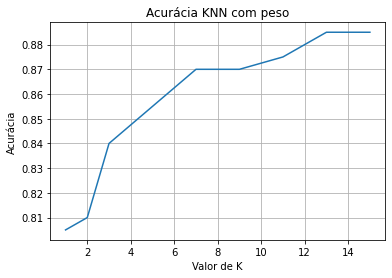

In [23]:
print(taxasAcertoComPeso)
plt.plot(taxasAcertoComPeso['k'],taxasAcertoComPeso['acuracia'])
plt.title("Acurácia KNN com peso")
plt.grid(True)
plt.xlabel("Valor de K")
plt.ylabel("Acurácia")